In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import SNOM_Import

import os

In [3]:
file_dir = "/home/conor/Desktop/SNOM Data"

file_names = ["2345-0","2344-0","2343-0"
             ,"2317-0","2316-0","2315-0"
             ,"2321-0","2320-0","2319-0"
             ,"2328-0","2326-0","2327-0"
             ,"2311-0","2312-0","2313-0"]

# Without Gold
file_names = ["2317-0","2316-0","2315-0"
             ,"2321-0","2320-0","2319-0"
             ,"2328-0","2326-0","2327-0"
             ,"2311-0","2312-0","2313-0"]

backgrounds_file_names = ["2332-0","2331-0","2330-0"
                         ,"2340-0","2339-0","2338-0"
                         ,"2345-0","2344-0","2343-0"]

In [4]:
datasets = {"HI_C6AU_PH7_A1":  [("2268-0",1626),("2267-0",1651),("2266-0",1689)],
            "HI_C6AU_PH7_A3":  [("2272-0",1626),("2273-0",1651),("2274-0",1689)],
            "HI_C18AU_PH7_A1": [("2257-0",1626),("2258-0",1651),("2259-0",1689)],
            "HI_C18AU_PH7_A2": [("2262-z000",1626),("2261-z000",1651),("2260-z000",1689)],
            "HI_C18AU_PH7_A3": [("2263-z000",1626),("2264-z000",1651),("2265-z000",1689)],
            "HI_C6AU_PH2_A2": [("2294-0",1626),("2295-0",1651),("2296-0",1689)],
            "HI_C18AU_PH2_A1": [("2278-0",1626),("2279-0",1651),("2280-0",1689)],
            "HI_C18AU_PH2_A2": [("2283-0",1626),("2282-0",1651),("2281-0",1689)],
            "HI_C18AU_PH2_A3": [("2284-0",1626),("2285-0",1651),("2286-0",1689)]
           }

The pairings for relevant background subtractions

bg_pairs = {"2317-0": "2332-0"
           ,"2316-0": "2331-0"
           ,"2315-0": "2330-0"
           ,"2321-0": "2340-0"
           ,"2320-0": "2339-0"
           ,"2319-0": "2338-0"
           ,"2328-0": "2332-0"
           ,"2326-0": "2331-0"
           ,"2327-0": "2330-0"
           ,"2311-0": "2340-0"
           ,"2312-0": "2339-0"
           ,"2313-0": "2338-0"}

In [5]:
bg_pairs_AU = {"2317-0": "2345-0"
           ,"2316-0": "2344-0"
           ,"2315-0": "2343-0"
           ,"2321-0": "2345-0"
           ,"2320-0": "2344-0"
           ,"2319-0": "2343-0"
           ,"2328-0": "2345-0"
           ,"2326-0": "2344-0"
           ,"2327-0": "2345-0"
           ,"2311-0": "2345-0"
           ,"2312-0": "2343-0"
           ,"2313-0": "2344-0"}

#bg_pairs_AU = {value: key for key, value in bg_pairs_AU.items()}

In [6]:
from scipy.stats import mode, ttest_ind

def correct_im(im, bkg):
    
    corrected = (im/im.sensitivity)/(bkg)
    
    return corrected

(array([   9.,    9.,  159., 1041., 3169., 5075., 5186., 4731., 2691.,
         430.]),
 array([240.4 , 261.62, 282.84, 304.06, 325.28, 346.5 , 367.72, 388.94,
        410.16, 431.38, 452.6 ]),
 <a list of 10 Patch objects>)

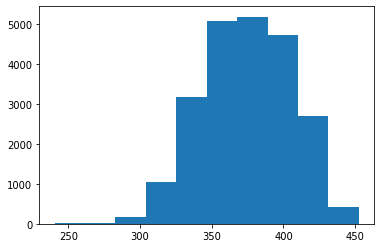

In [83]:
plt.hist((background_ims_DF.loc[row.BKG]["FSNOM"]/background_ims_DF.loc[row.BKG].sensitivity).flatten())

In [89]:
mode_h(background_ims_DF.loc[row.BKG]["FSNOM"]/background_ims_DF.loc[row.BKG].sensitivity, nbins = 100)

374.086

In [7]:
def mode_h(im, nbins):
    
    y, x = np.histogram(im.flatten(), bins = nbins)
    
    return x[np.argmax(y)]

In [10]:
images = {name: SNOM_Import.SNOM_File(os.path.join(file_dir, name)) for name in file_names}

im_objects_DF = pd.DataFrame({name: vars(im) for name, im in images.items()}).T


im_objects_DF = im_objects_DF.apply(lambda row: row.append(pd.Series(row["images"])), axis = 1)
im_objects_DF["BKG"] = im_objects_DF.apply(lambda row: bg_pairs_AU[row.name], axis = 1)

im_objects_DF["FSNOM_C"] = im_objects_DF.apply(lambda row: (row["FSNOM"]/row.sensitivity)/mode_h(background_ims_DF.loc[row.BKG]["FSNOM"]/background_ims_DF.loc[row.BKG].sensitivity, nbins = 100), axis = 1)
im_objects_DF["BSNOM_C"] = im_objects_DF.apply(lambda row: (row["BSNOM"]/row.sensitivity)/mode_h(background_ims_DF.loc[row.BKG]["BSNOM"]/background_ims_DF.loc[row.BKG].sensitivity, nbins = 100), axis = 1)

/home/conor/Desktop/SNOM Data/2317-0
Failed to load: /home/conor/Desktop/SNOM Data/2317-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2317-0-BZERO.AFM
/home/conor/Desktop/SNOM Data/2316-0
Failed to load: /home/conor/Desktop/SNOM Data/2316-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2316-0-BZERO.AFM
/home/conor/Desktop/SNOM Data/2315-0
Failed to load: /home/conor/Desktop/SNOM Data/2315-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2315-0-BZERO.AFM
/home/conor/Desktop/SNOM Data/2321-0
Failed to load: /home/conor/Desktop/SNOM Data/2321-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2321-0-BZERO.AFM
/home/conor/Desktop/SNOM Data/2320-0
Failed to load: /home/conor/Desktop/SNOM Data/2320-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2320-0-BZERO.AFM
/home/conor/Desktop/SNOM Data/2319-0
Failed to load: /home/conor/Desktop/SNOM Data/2319-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2319-0-BZERO.AFM
/home/conor/Desktop/SN

In [11]:
import Tissue_Analysis_Tools as TAT

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


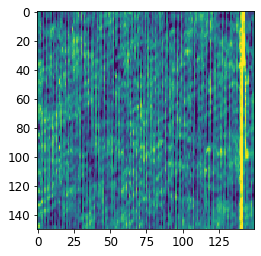

In [12]:
TAT.perc_plot(im_objects_DF.iloc[0]["FSNOM_C"], 1,99)

['_A',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_agg_filter',
 '_alpha',
 '_animated',
 '_axes',
 '_check_unsampled_image',
 '_clipon',
 '_clippath',
 '_contains',
 '_draw_unsampled_image',
 '_extent',
 '_filternorm',
 '_filterrad',
 '_gid',
 '_imcache',
 '_in_layout',
 '_interpolation',
 '_label',
 '_make_image',
 '_mouseover',
 '_oid',
 '_path_effects',
 '_picker',
 '_prop_order',
 '_propobservers',
 '_rasterized',
 '_remove_method',
 '_resample',
 '_rgbacache',
 '_set_gc_clip',
 '_sketch',
 '_snap',
 '_stale',
 '_sticky_edges',
 '_transform',
 '_transformSet',
 '_url',
 '_visible',
 'add_callback',
 'add_checker',
 'aname',
 'autoscale',
 'a

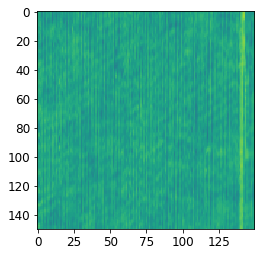

In [113]:
dir(plt.imshow(im_objects_DF.iloc[0]["FSNOM_C"], vmin = 0, vmax = 3))

In [303]:
def cbar_plot(im, u_abs = None, l_abs = None, u_perc = None, l_perc = None, cmap = "viridis"):
    
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))      
    implot = axes[0].imshow(im, interpolation = None, vmin = u_abs, vmax = l_abs, cmap = cmap)
        
    
    cbar = plt.colorbar(implot, orientation = "horizontal")
    
    colours = np.array(cbar.get_cmap().colors).reshape(-1,3)
    n, bins, patches = axes[1].hist(im.flatten(), cbar._values)
    axes[1].set_xlabel("Absorbance $(A.U)$")

    [plt.setp(p, "facecolor", c) for c, p in zip(colours, patches)]
    plt.tight_layout()

/home/conor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The get_cmap function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.get_cmap instead.
  if __name__ == '__main__':


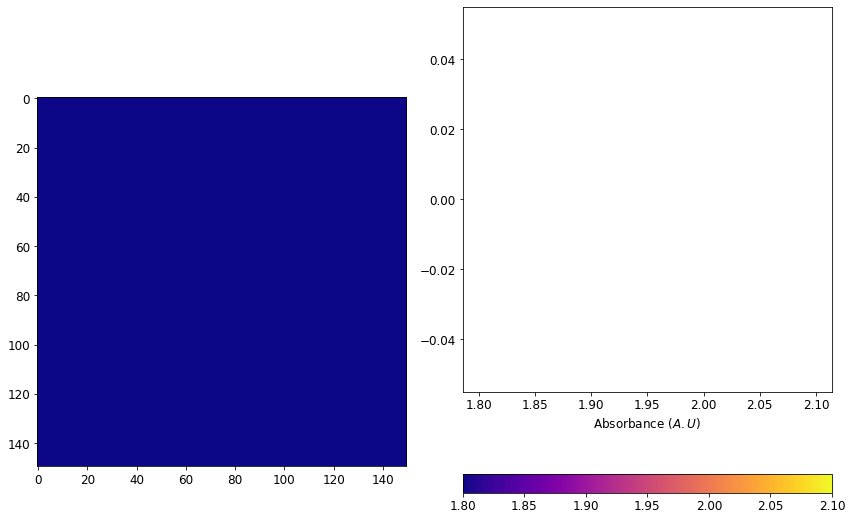

In [310]:
cbar_plot(im_objects_DF.iloc[2]["FSNOM_C"],1.8, 2.1, cmap = "plasma")

/home/conor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The get_cmap function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.get_cmap instead.
  if __name__ == '__main__':


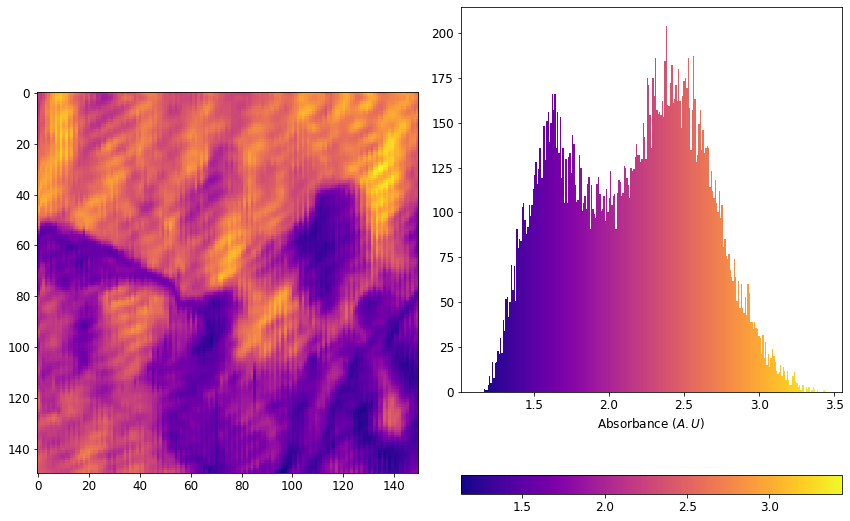

In [316]:
cbar_plot(im_objects_DF.iloc[6]["FSNOM_C"], cmap = "plasma")

/home/conor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The get_cmap function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.get_cmap instead.
  if __name__ == '__main__':


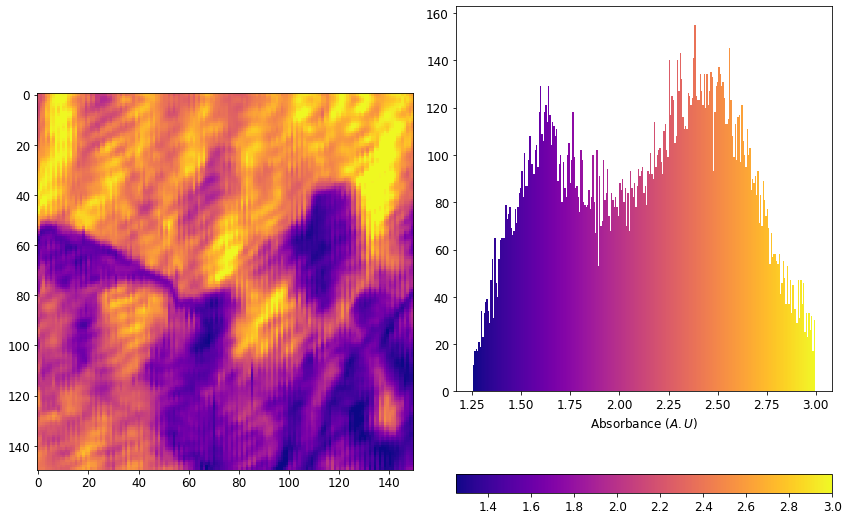

In [318]:
cbar_plot(im_objects_DF.iloc[6]["FSNOM_C"], 1.25, 3, cmap = "plasma")

In [12]:
plt.im_objects_DF

,HEADR,fileName,images,pH,sensitivity,substrate,wavenumber,FTOPO,FSNOM,BTOPO,BSNOM,BKG,FSNOM_C,BSNOM_C
2317-0,Number of Files 4 \n\nStart time=...,/home/conor/Desktop/SNOM Data/2317-0,"{'FTOPO': [[19995, 19614, 19786, 21278, 19164,...",7.0,5.0,C6/Au,1626.0,"[[19995, 19614, 19786, 21278, 19164, 19675, 18...","[[5377, 5707, 5627, 4845, 5929, 4864, 5846, 49...","[[19149, 19277, 20190, 18186, 20663, 18905, 19...","[[5680, 5323, 5327, 6126, 4923, 5862, 4769, 48...",2345-0,"[[1.7218797534224644, 1.8275558402049479, 1.80...","[[1.959350378761746, 1.8362010679839387, 1.837..."
2316-0,Number of Files 4 \n\nStart time=...,/home/conor/Desktop/SNOM Data/2316-0,"{'FTOPO': [[26213, 26295, 27119, 26908, 26407,...",7.0,5.0,C6/Au,1651.0,"[[26213, 26295, 27119, 26908, 26407, 27600, 25...","[[2254, 2347, 2349, 2377, 2431, 2358, 2379, 22...","[[26824, 26774, 27079, 26274, 27907, 25188, 27...","[[2443, 2426, 2397, 2416, 2345, 2333, 2201, 22...",2344-0,"[[1.2050704918120432, 1.2547916789187512, 1.25...","[[1.3001596593932943, 1.2911122937732835, 1.27..."
2315-0,Number of Files 4 \n\nStart time=...,/home/conor/Desktop/SNOM Data/2315-0,"{'FTOPO': [[24121, 24343, 21208, 24131, 23097,...",7.0,5.0,C6/Au,1689.0,"[[24121, 24343, 21208, 24131, 23097, 25197, 24...","[[3325, 3271, 3166, 3071, 3114, 3191, 3156, 30...","[[24143, 21984, 22933, 23159, 24374, 25033, 23...","[[3158, 3186, 3143, 3148, 3171, 3114, 3128, 31...",2343-0,"[[1.9355026485825715, 1.9040689213574713, 1.84...","[[1.8079083107678742, 1.823937896803815, 1.799..."
2321-0,Number of Files 4 \n\nStart time=...,/home/conor/Desktop/SNOM Data/2321-0,"{'FTOPO': [[9533, 11195, 10539, 9970, 9872, 95...",7.0,5.0,C18/Au,1626.0,"[[9533, 11195, 10539, 9970, 9872, 9546, 9143, ...","[[3259, 2584, 2700, 2688, 2834, 3061, 3146, 33...","[[10588, 9589, 10035, 9897, 8872, 8921, 8260, ...","[[3129, 3002, 3081, 3271, 3391, 3563, 3642, 35...",2345-0,"[[1.0436314146185253, 0.8274757825634457, 0.86...","[[1.0793674885819546, 1.0355580699018945, 1.06..."
2320-0,Number of Files 4 \n\nStart time=...,/home/conor/Desktop/SNOM Data/2320-0,"{'FTOPO': [[16598, 14371, 16773, 16727, 17071,...",7.0,5.0,C18/Au,1651.0,"[[16598, 14371, 16773, 16727, 17071, 16690, 16...","[[1475, 1222, 1186, 1180, 1223, 1400, 1432, 16...","[[15337, 17107, 16846, 16889, 16805, 16432, 16...","[[1232, 1239, 1329, 1423, 1578, 1500, 1730, 15...",2344-0,"[[0.7885887202408002, 0.6533257058537342, 0.63...","[[0.6556679084619479, 0.6593932943054817, 0.70..."
2319-0,Number of Files 4 \n\nStart time=...,/home/conor/Desktop/SNOM Data/2319-0,"{'FTOPO': [[10778, 11068, 10917, 10943, 10676,...",7.0,5.0,C18/Au,1689.0,"[[10778, 11068, 10917, 10943, 10676, 10816, 10...","[[2751, 2576, 2595, 2693, 2856, 3132, 3309, 30...","[[11652, 11997, 11659, 11363, 11712, 11012, 10...","[[2913, 2686, 2552, 2575, 2807, 2993, 2632, 31...",2343-0,"[[1.6013737703009487, 1.4995052098492345, 1.51...","[[1.6676494329533937, 1.537695289019161, 1.460..."
2328-0,Number of Files 4 \n\nStart time=...,/home/conor/Desktop/SNOM Data/2328-0,"{'FTOPO': [[2038, 4524, 1171, 3047, 631, 2037,...",2.0,5.0,C6/Au,1626.0,"[[2038, 4524, 1171, 3047, 631, 2037, 443, 1929...","[[6934, 6884, 7179, 7879, 8148, 8769, 9050, 93...","[[2864, 435, 2276, 502, 1952, 1720, 2673, 2473...","[[7167, 7401, 8137, 8278, 8862, 9005, 9269, 92...",2345-0,"[[2.2204787446961816, 2.204467216395805, 2.298...","[[2.4723000289763086, 2.553019745284451, 2.806..."
2326-0,Number of Files 4 \n\nStart time=...,/home/conor/Desktop/SNOM Data/2326-0,"{'FTOPO': [[11604, 11236, 10695, 9790, 9703, 9...",2.0,5.0,C6/Au,1651.0,"[[11604, 11236, 10695, 9790, 9703, 9055, 9232,...","[[3263, 2840, 2635, 2663, 2535, 2567, 2566, 26...","[[10570, 9383, 9657, 9333, 9062, 9061, 8941, 1...","[[2555, 2602, 2630, 2687, 2821, 2797, 2992, 28...",2344-0,"[[1.7445186400988009, 1.5183674342263542, 1.40...","[[1.359765832889835, 1.3847791378392762, 1.399..."
2327-0,Number of Files 4 \n\nStart time=...,/home/conor/Desktop/SNOM Data/2327-0,"{'FTOPO': [[3703, 5546, 5595

In [9]:
background_ims = {value: SNOM_Import.SNOM_File(os.path.join(file_dir, value)) for name,value in bg_pairs_AU.items()}
background_ims_DF = pd.DataFrame({name: vars(im) for name, im in background_ims.items()}).T

background_ims_DF = background_ims_DF.apply(lambda row: row.append(pd.Series(row["images"])), axis = 1)

/home/conor/Desktop/SNOM Data/2345-0
Failed to load: /home/conor/Desktop/SNOM Data/2345-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2345-0-BZERO.AFM
/home/conor/Desktop/SNOM Data/2344-0
Failed to load: /home/conor/Desktop/SNOM Data/2344-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2344-0-BZERO.AFM
/home/conor/Desktop/SNOM Data/2343-0
Failed to load: /home/conor/Desktop/SNOM Data/2343-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2343-0-BZERO.AFM
/home/conor/Desktop/SNOM Data/2345-0
Failed to load: /home/conor/Desktop/SNOM Data/2345-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2345-0-BZERO.AFM
/home/conor/Desktop/SNOM Data/2344-0
Failed to load: /home/conor/Desktop/SNOM Data/2344-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2344-0-BZERO.AFM
/home/conor/Desktop/SNOM Data/2343-0
Failed to load: /home/conor/Desktop/SNOM Data/2343-0-FZERO.AFM
Failed to load: /home/conor/Desktop/SNOM Data/2343-0-BZERO.AFM
/home/conor/Desktop/SN

In [18]:
background_ims_DF.loc[:,["sensitivity", "substrate", "wavenumber"]]

,sensitivity,substrate,wavenumber
2345-0,5.0,Scan,1626.0
2344-0,5.0,Scan,1651.0
2343-0,5.0,Scan,1689.0


In [107]:
for name, row in pd.concat([im_objects_DF, background_ims_DF], axis = 0).iterrows():
    for im_name in ["FSNOM","BSNOM", "FTOPO", "BTOPO"]:
    
        np.savetxt("/home/conor/Desktop/Stuff_for_Nathan/Raw_plots/{}_{}.csv".format(name,im_name)
                   , row[im_name])
    
    try:
        for im_name in ["FSNOM_C", "BSNOM_C"]:
            np.savetxt("/home/conor/Desktop/Stuff_for_Nathan/Corrected_Plots/{}_{}.csv".format(name,im_name)
                   , row[im_name])
    except: pass

/home/conor/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [296]:
background_ims

{'2345-0': <SNOM_Import.SNOM_File at 0x7f4d0426e6d8>,
 '2344-0': <SNOM_Import.SNOM_File at 0x7f4d0426e9b0>,
 '2343-0': <SNOM_Import.SNOM_File at 0x7f4d04274dd8>}

In [101]:
plt.figure(figsize = (10,10))
plt.imshow(im_objects_DF.loc["2328-0"]["images"]["FSNOM_C"], vmin = 5000, vmax = 7500)
plt.colorbar()

KeyError: 'FSNOM_C'

<Figure size 720x720 with 0 Axes>

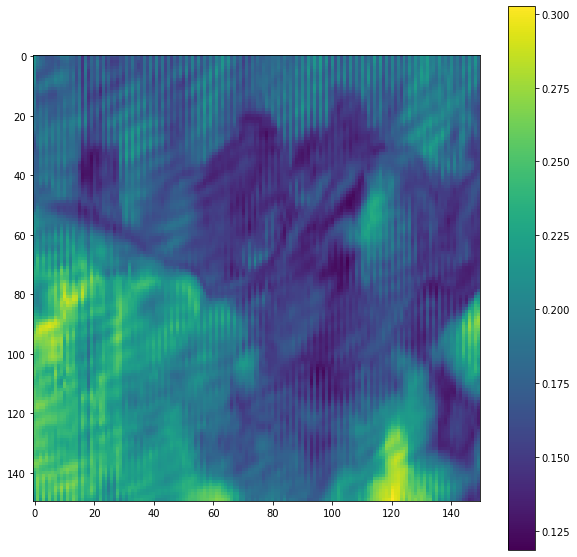

In [72]:
plt.figure(figsize = (10,10))
plt.imshow((im_objects_DF.loc["2326-0"]["images"]["FSNOM"]/im_objects_DF.loc["2326-0"].sensitivity)/3077)
plt.colorbar()

In [66]:
mode(np.concatenate([background_ims["2345-0"].images["FSNOM"]
                , background_ims["2345-0"].images["BSNOM"]]
               , axis = 1).flatten())[0]

array([2938], dtype=int16)

In [73]:
mode(background_ims["2345-0"].images["FSNOM"].flatten())[0]

array([3077], dtype=int16)

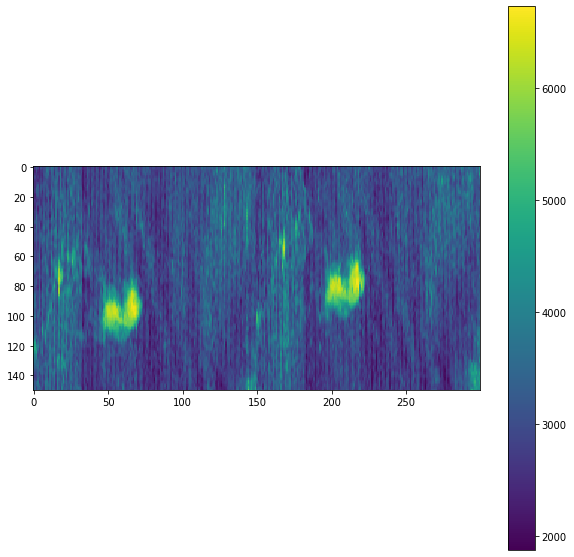

In [65]:
plt.figure(figsize = (10,10))
plt.imshow(np.concatenate([background_ims["2345-0"].images["FSNOM"]
                          , background_ims["2345-0"].images["BSNOM"]], axis = 1))
plt.colorbar()

(array([   9.,  130.,  382.,  682.,  875., 1097., 1310., 1086., 1046.,
         912.,  913.,  910.,  992., 1077., 1250., 1379., 1466., 1426.,
        1349., 1199.,  936.,  679.,  479.,  385.,  234.,  141.,   88.,
          44.,   19.,    5.]),
 array([ 3518.        ,  3758.96666667,  3999.93333333,  4240.9       ,
         4481.86666667,  4722.83333333,  4963.8       ,  5204.76666667,
         5445.73333333,  5686.7       ,  5927.66666667,  6168.63333333,
         6409.6       ,  6650.56666667,  6891.53333333,  7132.5       ,
         7373.46666667,  7614.43333333,  7855.4       ,  8096.36666667,
         8337.33333333,  8578.3       ,  8819.26666667,  9060.23333333,
         9301.2       ,  9542.16666667,  9783.13333333, 10024.1       ,
        10265.06666667, 10506.03333333, 10747.        ]),
 <a list of 1 Patch objects>)

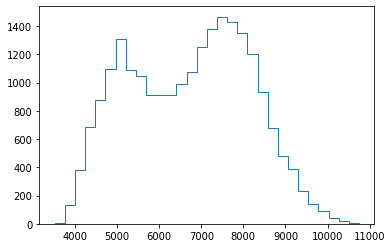

In [36]:
plt.hist(im_objects_DF.loc["2328-0"]["images"]["FSNOM"].flatten(), histtype = "step", bins = 30)


2321-0 - 2311-0:- P:0.0 T:-231.7660371531633
Difference: -0.41639951650199736

2317-0 - 2328-0:- P:0.0 T:-153.15774937166267
Difference: 0.16437618246794194

2320-0 - 2313-0:- P:0.0 T:-307.48325228244516
Difference: -0.4385354946897708

2316-0 - 2326-0:- P:0.0 T:-294.8431845245024
Difference: -0.2125992174399105

2319-0 - 2312-0:- P:0.0 T:-217.82722504628157
Difference: -0.5255815018577144

2315-0 - 2327-0:- P:0.0 T:2150.797768312395
Difference: 1.1178354233826444


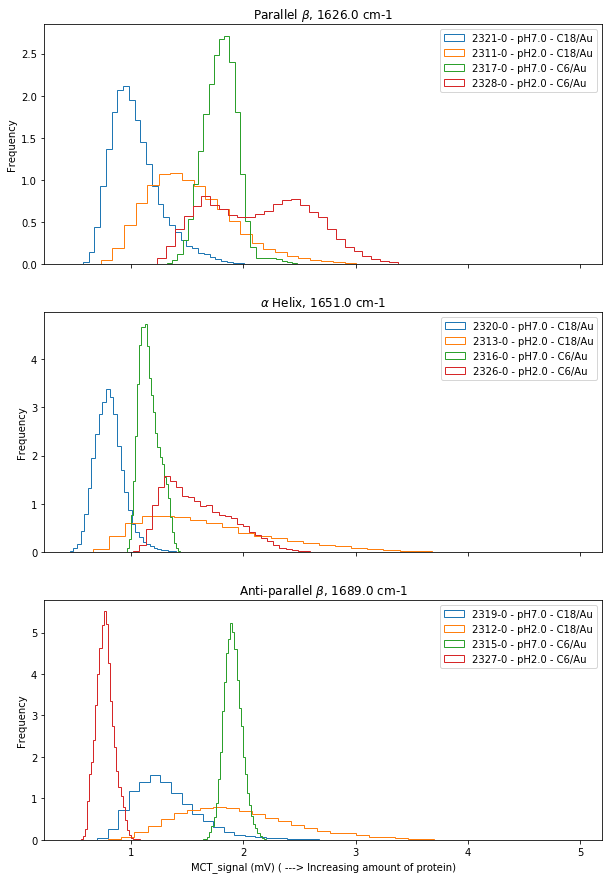

In [124]:
from scipy.stats import mode, ttest_ind

title = "Wavenumber"

fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10,15), sharex = True)

axes_f = axes.flatten()
i = 0

fig.set_title = title

for wn, df in im_objects_DF.groupby("wavenumber"):
    
    axes_f[i].set_title("{}, {} cm-1".format(labels[int(wn)], wn))
    
    for substrate, df in df.groupby("substrate"):
        
        list_ = dict()
        
        for name, im_object in df.iterrows():
            
            # Load in FNOM and BSNOM for the scan, correct for sensitivity and flatten
            fsnom = (im_object["images"]["FSNOM"]/im_object.sensitivity).flatten()
            bsnom = (im_object["images"]["BSNOM"]/im_object.sensitivity).flatten()
            
            bkg_im_obj = background_ims[bg_pairs_AU[name]]

            f_bkg = (bkg_im_obj.images["FSNOM"]/bkg_im_obj.sensitivity).flatten()
            b_bkg = (bkg_im_obj.images["BSNOM"]/bkg_im_obj.sensitivity).flatten()

            hist = np.concatenate([fsnom,bsnom]) / mode_h(np.concatenate([f_bkg, b_bkg]), nbins = 100)
            
            list_[name] = hist
            
            axes_f[i].hist((hist)
                     , label = "{} - pH{} - {}".format(name, im_object.pH, substrate)
                     , bins = 30
                     , histtype = "step"
                     , density = True)
            
        
        axes_f[i].legend()
        axes_f[i].set_ylabel("Frequency")
        
        
        keys = list(list_.keys())
        values = list(list_.values())
        
        t,p = ttest_ind(values[0], values[1], equal_var = False)
        
        print("\n{} - {}:- P:{} T:{}".format(keys[0], keys[1], p, t))
        print("Difference: {}".format(mode_h(values[0], nbins = 100) - mode_h(values[1], nbins = 100)))
        #print("Difference: {}".format(np.mean(values[0]) - np.mean(values[1])))

    
    i = i+1
    
plt.xlabel("MCT_signal (mV) ( ---> Increasing amount of protein)")
plt.savefig(os.path.join("/home/conor/Desktop//Stuff_for_Nathan/Graphs", title + ".png"), bbox_inches = "tight")


2328-0 - 2311-0:- P:0.0 T:214.8422492443299
Difference: 0.3648964683624132

2326-0 - 2313-0:- P:3.864155668570089e-220 T:-31.791691121266773
Difference: 0.09005030743432085

2327-0 - 2312-0:- P:0.0 T:-475.07319924839476
Difference: -0.9332318407701653

2317-0 - 2321-0:- P:0.0 T:588.6245893347543
Difference: 0.9456721673323525

2316-0 - 2320-0:- P:0.0 T:479.93877212209895
Difference: 0.31598658468418117

2315-0 - 2319-0:- P:0.0 T:377.58060968522113
Difference: 0.7101850844701936


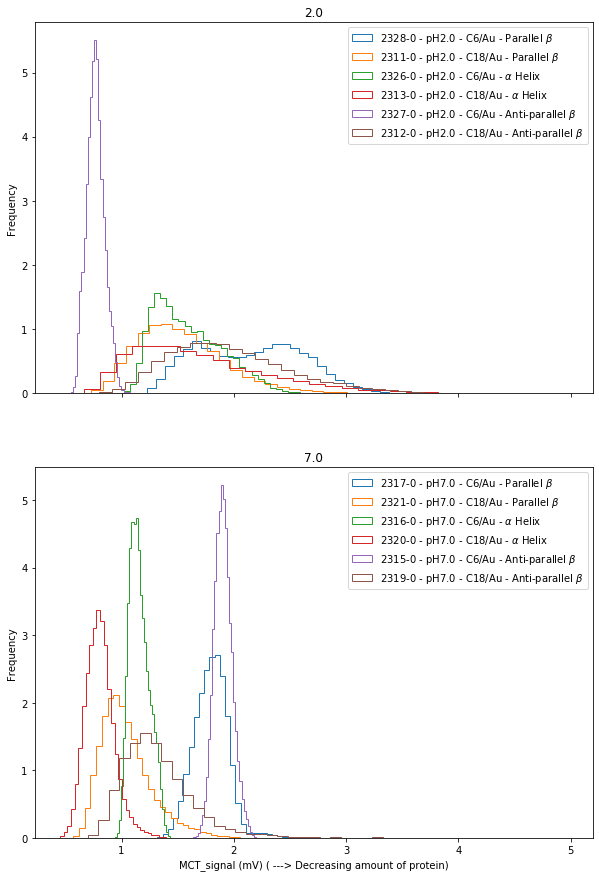

In [125]:
from scipy.stats import mode, ttest_ind

title = "pH"

fig, axes = plt.subplots(ncols = 1, nrows = 2, figsize = (10,15), sharex = True)

axes_f = axes.flatten()
i = 0

fig.set_title = title

for wn, df in im_objects_DF.groupby("pH"):
    
    try: 
        axes_f[i].set_title("pH{}, {} cm-1".format(labels[wn], wn))
        
    except:
        
        axes_f[i].set_title(wn)
    
    for substrate, df in df.groupby("wavenumber"):
        
        list_ = dict()
        
        for name, im_object in df.iterrows():
            
            # Load in FNOM and BSNOM for the scan, correct for sensitivity and flatten
            fsnom = (im_object["images"]["FSNOM"]/im_object.sensitivity).flatten()
            bsnom = (im_object["images"]["BSNOM"]/im_object.sensitivity).flatten()
            
            bkg_im_obj = background_ims[bg_pairs_AU[name]]

            f_bkg = (bkg_im_obj.images["FSNOM"]/bkg_im_obj.sensitivity).flatten()
            b_bkg = (bkg_im_obj.images["BSNOM"]/bkg_im_obj.sensitivity).flatten()

            hist = np.concatenate([fsnom,bsnom]) / mode_h(np.concatenate([f_bkg, b_bkg]), nbins = 100)
            
            list_[name] = hist
            
            axes_f[i].hist((hist)
                     , label = "{} - pH{} - {} - {}".format(name, im_object.pH, im_object.substrate, labels[im_object.wavenumber])
                     , bins = 30
                     , histtype = "step"
                     , density = True)
            
        
        axes_f[i].legend()
        axes_f[i].set_ylabel("Frequency")
        
        
        keys = list(list_.keys())
        values = list(list_.values())
        
        t,p = ttest_ind(values[0], values[1], equal_var = False)
        
        print("\n{} - {}:- P:{} T:{}".format(keys[0], keys[1], p, t))
        print("Difference: {}".format(mode_h(values[0], nbins = 100) - mode_h(values[1], nbins = 100)))
        #print("Difference: {}".format(np.mean(values[0]) - np.mean(values[1])))

    
    i = i+1
    
plt.xlabel("MCT_signal (mV) ( ---> Decreasing amount of protein)")
plt.savefig(os.path.join("/home/conor/Desktop/Stuff_for_Nathan/Graphs", title + ".png"), bbox_inches = "tight")


2321-0_2311-0:- P:0.0 T:-231.7660371531633
Difference: -0.41639951650199736

2320-0_2313-0:- P:0.0 T:-307.48325228244516
Difference: -0.4385354946897708

2319-0_2312-0:- P:0.0 T:-217.82722504628157
Difference: -0.5255815018577144

2317-0_2328-0:- P:0.0 T:-153.15774937166267
Difference: 0.16437618246794194

2316-0_2326-0:- P:0.0 T:-294.8431845245024
Difference: -0.2125992174399105

2315-0_2327-0:- P:0.0 T:2150.797768312395
Difference: 1.1178354233826444


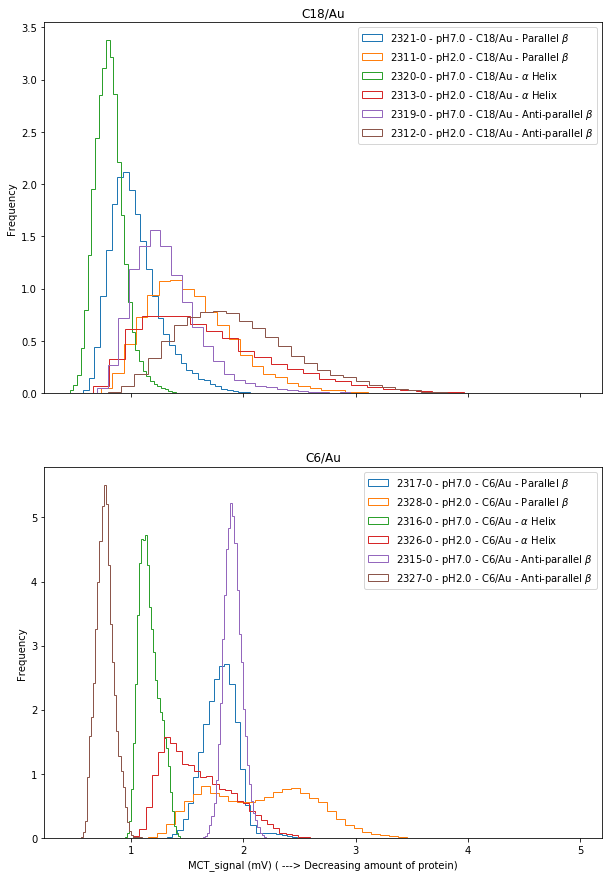

In [126]:
from scipy.stats import mode, ttest_ind

title = "substrate"

fig, axes = plt.subplots(ncols = 1, nrows = 2, figsize = (10,15), sharex = True)

axes_f = axes.flatten()
i = 0

fig.set_title = title

for wn, df in im_objects_DF.groupby("substrate"):
    
    try: 
        axes_f[i].set_title("{}, {} cm-1".format(labels[wn], wn))
        
    except:
        
        axes_f[i].set_title(wn)
    
    for substrate, df in df.groupby("wavenumber"):
        
        list_ = dict()
        
        for name, im_object in df.iterrows():
            
            # Load in FNOM and BSNOM for the scan, correct for sensitivity and flatten
            fsnom = (im_object["images"]["FSNOM"]/im_object.sensitivity).flatten()
            bsnom = (im_object["images"]["BSNOM"]/im_object.sensitivity).flatten()
            
            bkg_im_obj = background_ims[bg_pairs_AU[name]]

            f_bkg = (bkg_im_obj.images["FSNOM"]/bkg_im_obj.sensitivity).flatten()
            b_bkg = (bkg_im_obj.images["BSNOM"]/bkg_im_obj.sensitivity).flatten()

            hist = np.concatenate([fsnom,bsnom]) / mode_h(np.concatenate([f_bkg, b_bkg]), nbins = 100)
            
            list_[name] = hist
            
            axes_f[i].hist((hist)
                     , label = "{} - pH{} - {} - {}".format(name, im_object.pH, im_object.substrate, labels[im_object.wavenumber])
                     , bins = 30
                     , histtype = "step"
                     , density = True)
            
        
        axes_f[i].legend()
        axes_f[i].set_ylabel("Frequency")
        
        
        keys = list(list_.keys())
        values = list(list_.values())
        
        t,p = ttest_ind(values[0], values[1], equal_var = False)
        
        print("\n{}_{}:- P:{} T:{}".format(keys[0], keys[1], p, t))
        print("Difference: {}".format(mode_h(values[0], nbins = 100) - mode_h(values[1], nbins = 100)))
        #print("Difference: {}".format(np.mean(values[0]) - np.mean(values[1])))

    
    i = i+1
    
plt.xlabel("MCT_signal (mV) ( ---> Decreasing amount of protein)")
plt.savefig(os.path.join("/home/conor/Desktop/Stuff_for_Nathan/Graphs", title + ".png"), bbox_inches = "tight")

In [91]:
labels = {1651: r"$\alpha$ Helix",
          1626: r"Parallel $\beta$",
          1689: r"Anti-parallel $\beta$"}

In [221]:
np.concatenate([fsnom,bsnom])/mode(np.concatenate([f_bkg, b_bkg]))

array([[ 3.29307116,  3.4428839 ,  3.34269663, ...,  4.07116105,
         4.37921348,  4.26685393],
       [18.51052632, 19.35263158, 18.78947368, ..., 22.88421053,
        24.61578947, 23.98421053]])

In [223]:
mode(np.concatenate([f_bkg, b_bkg]))[0]

array([1068], dtype=int16)

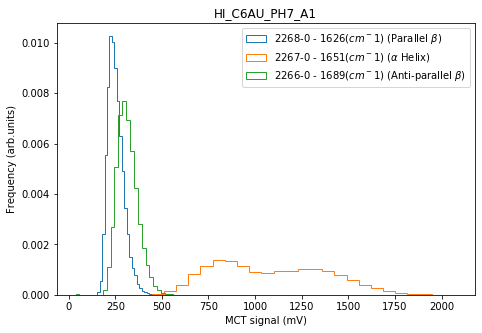

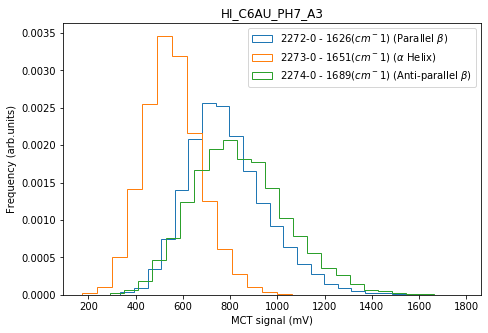

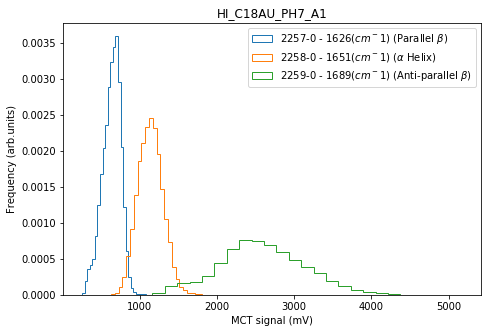

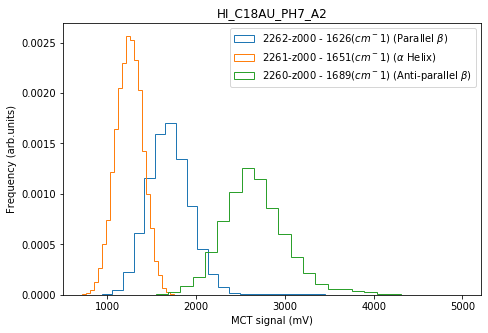

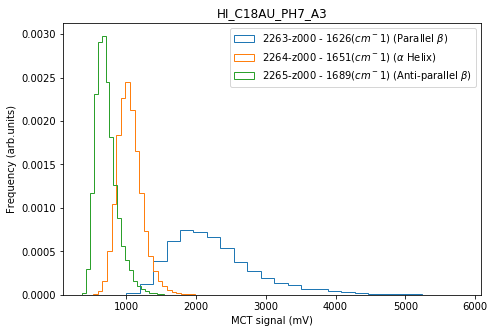

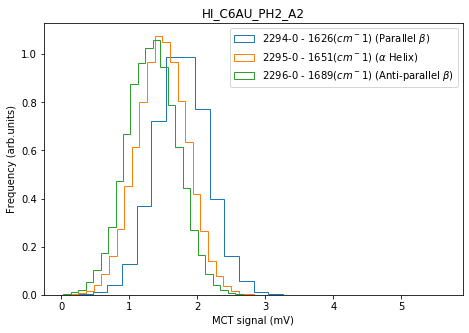

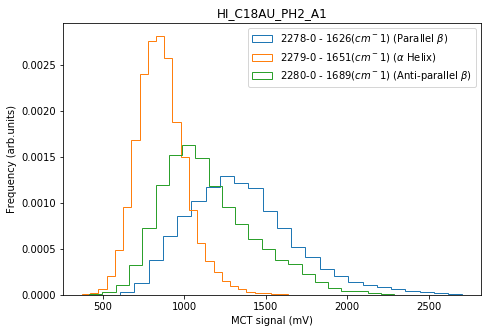

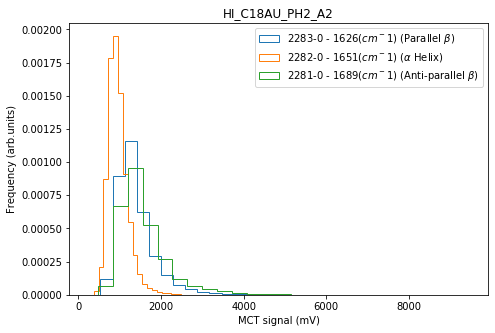

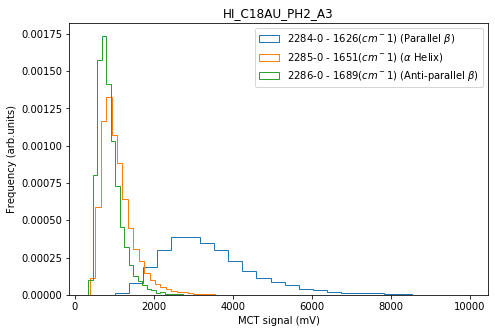

In [25]:
for data_set_name, dataset in datasets.items():

    plt.figure(figsize = (7.5,5))

    for im in dataset:

        img = SNOM_Import.SNOM_File(os.path.join(file_dir, im[0]))

        plt.hist((img.images["FSNOM"].image/img.sensitivity).flatten()
                 , label = "{} - {}$(cm^-1)$ ({})".format(im[0], im[1], labels[im[1]])
                 , histtype = "step"
                 , bins = 25
                 , density = True)
        
    plt.title(data_set_name)
    plt.xlabel("MCT signal (mV)")
    plt.ylabel("Frequency (arb.units)")
    plt.legend()
    plt.savefig(os.path.join("/home/conor/Desktop/Insulin_Histograms_Run_2", data_set_name))

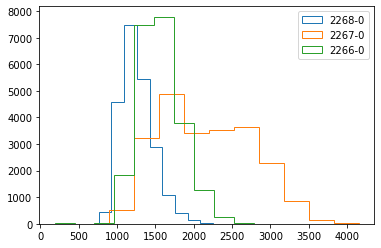

In [63]:
for im_name in HI_C6AU_PH7:
    
    img = SNOM_Import.SNOM_File(os.path.join(file_dir, im_name))

    plt.hist((img.images["FSNOM"].image).flatten(), label = im_name, histtype = "step")
    
plt.legend()

In [ ]:
dir(SNOM_Import)


2321-0_2311-0:- P:0.0 T:-231.7660371531633
Difference: [-0.52784055]
Difference: -0.4935870748954758

2317-0_2328-0:- P:0.0 T:-153.15774937166267
Difference: [0.17244324]
Difference: -0.351346612010371

2320-0_2313-0:- P:0.0 T:-307.48325228244516
Difference: [-0.49189491]
Difference: -0.8877535059934163

2316-0_2326-0:- P:0.0 T:-294.8431845245024
Difference: [-0.21743991]
Difference: -0.4342432147071611

2319-0_2312-0:- P:0.0 T:-217.82722504628157
Difference: [-0.60168196]
Difference: -0.6273878580974535

2315-0_2327-0:- P:0.0 T:2150.797768312395
Difference: [1.1028035]
Difference: 1.1376363529710511


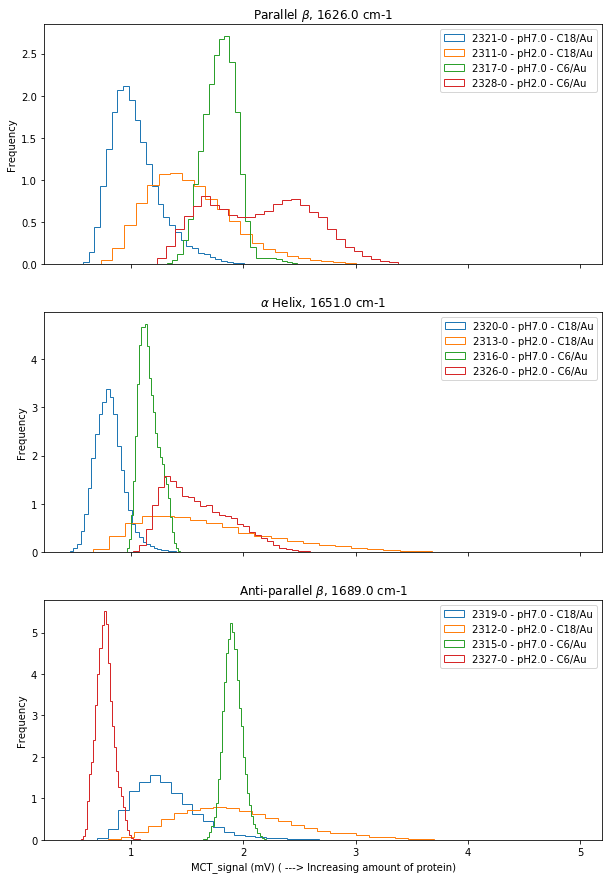

In [108]:
from scipy.stats import mode, ttest_ind

title = "Wavenumber"

fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10,15), sharex = True)

axes_f = axes.flatten()
i = 0

fig.set_title = title

for wn, df in im_objects_DF.groupby("wavenumber"):
    
    
